## Importing modules and running .py file

In [1]:
#Import modules #Run this once

import numpy as np
import pandas as pd
import os.path
from pylab import *
import glob
import os
import re
from xlwt import Workbook
from scipy.optimize import curve_fit
global pointnumber
from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit import  Model, Parameter, Parameters
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Run this to make sure you are in the main folder
parentdir = os.getcwd()
os.chdir(r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017')
homedir = os.getcwd()
print('The working(parent) directory is %s' %parentdir)
print('The data(home) directory is %s' %homedir)

The working(parent) directory is D:\Research\Reports and Presentation\reports\azurin_single-molecule\azurin_single-molecule\Analysis
The data(home) directory is D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017


In [3]:
#list of folders and their directories
S101d14Feb17_60o5_635_A2_CuAzu655= r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d14Feb17_60.5_635_A2_CuAzu655';
S101d15Feb17_60o5_635_A2_CuAzu655= r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d15Feb17_60.5_635_A2_CuAzu655';
S101d15Feb17_62o2_635_A2_CuAzu655_2nd= r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d15Feb17_62.2_635_A2_CuAzu655_2nd';
S101d16Feb17_60o5_635_A3_CuAzu655= r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d16Feb17_60.5_635_A3_CuAzu655';
S104d20Feb17_60o5_635_A1_CuAzu655= r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S104d20Feb17_60.5_635_A1_CuAzu655';
S104d21Feb17_60o5_635_A1_CuAzu655= r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S104d21Feb17_60.5_635_A1_CuAzu655';
S104d21Feb17_60o5_635_A2_CuAzu655= r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S104d21Feb17_60.5_635_A2_CuAzu655';
allfolders = [S101d14Feb17_60o5_635_A2_CuAzu655, S101d15Feb17_60o5_635_A2_CuAzu655, S101d15Feb17_62o2_635_A2_CuAzu655_2nd, S101d16Feb17_60o5_635_A3_CuAzu655,
#              S104d20Feb17_60o5_635_A1_CuAzu655, S104d21Feb17_60o5_635_A1_CuAzu655, S104d21Feb17_60o5_635_A2_CuAzu655]

In [4]:
#Run this once to run the .py file.
os.chdir(parentdir)
!python Analysis_CuAz_April2017.py
%run Analysis_CuAz_April2017.py

## Figure Parameters

In [4]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

## Mid-Point potential histogram: Nernst equation

The file Point_A2_090mV(18)_60.5__30s_11.pt3.datn.em.plot does not exist
The file Point_A2_040mV(17)_60.5__30s_16.pt3.datn.em.plot does not exist
The file Point_A2_045mV(26)_60.5__30s_14.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_2.pt3.datn.em.plot does not exist
The file Point_A2_050mV(8)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_050mV(8)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A2_080mV(35)_60.5__30s_19.pt3.datn.em.plot does not exist
The file Point_A2_095mV(31)_60.5__30s_19.pt3.datn.em.plot does not exist
The file Point_A3_100mV(7)_60.5__30s_15.pt3.datn.em.plot does not exist
The file Point_A3_050mV(12)_60.5__30s_19.pt3.datn.em.plot does not exist
The average midpoint potential according to TT:
0.00128539217646
The average midpoint potential according to FCS:
0.00780918333236


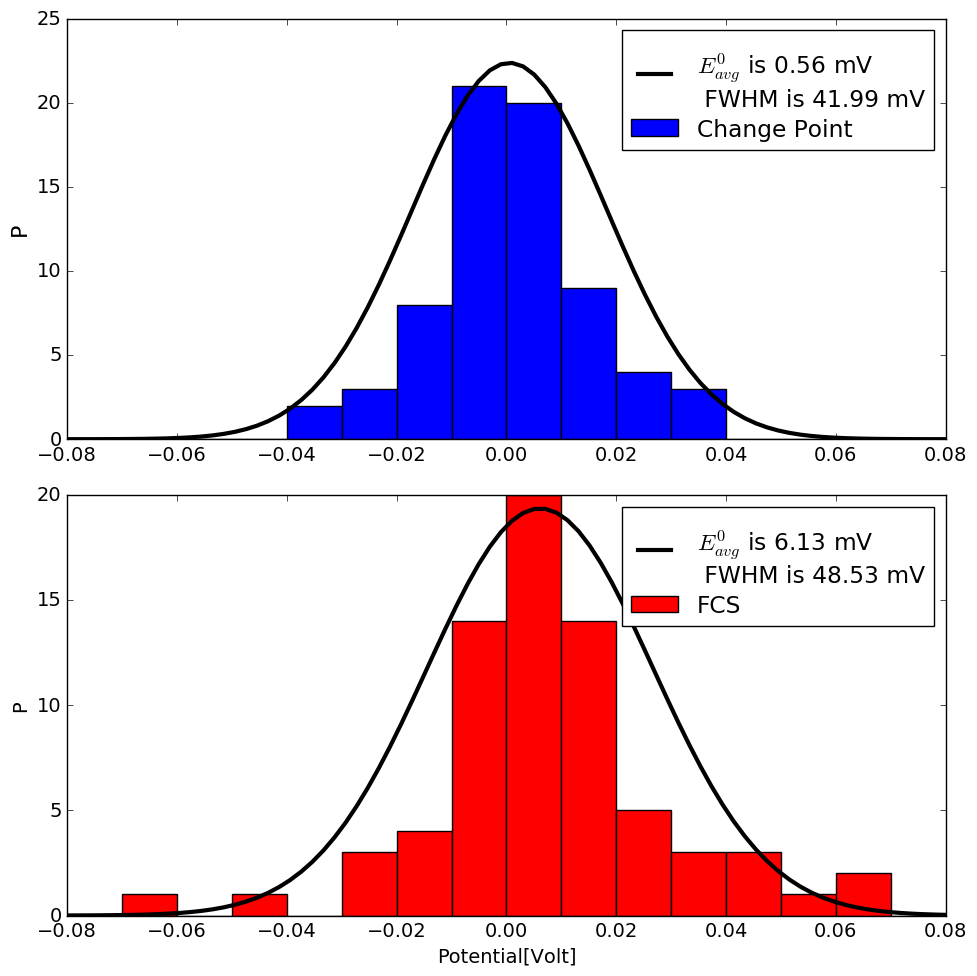

In [7]:
#Timetrace ratio t_off/t_on all days (FCS below specific potential) and FCS ratio
#All the values will be written in two different .xls files
#Folder names are the sheets.
#name excelfiles
os.chdir(homedir)
excel_name = 't_ratio_TT.xls'
excel_name_FCS = 't_ratio_FCS.xls'

#potential > this value is TT, potential < this value is FCS
imp_pot = 40
tminFCS = 0.01
tmaxFCS = 10000
minimal_points = 5
inp_bins = 20 #bins of the histograms
#range of the fit histogram
min_range = -0.1
max_range = 0.1 
#range of the histograms
#TT 
min_x1 = -0.08
max_x1 = 0.08
#FCS
min_x2 = -0.08
max_x2 = 0.08
midpoint_potential_array, midpoint_potential_array_FCS = midpoint_histograms(excel_name, excel_name_FCS, imp_pot, tminFCS, tmaxFCS, minimal_points, inp_bins,
                                                                             min_range, max_range, min_x1, max_x1, min_x2, max_x2);

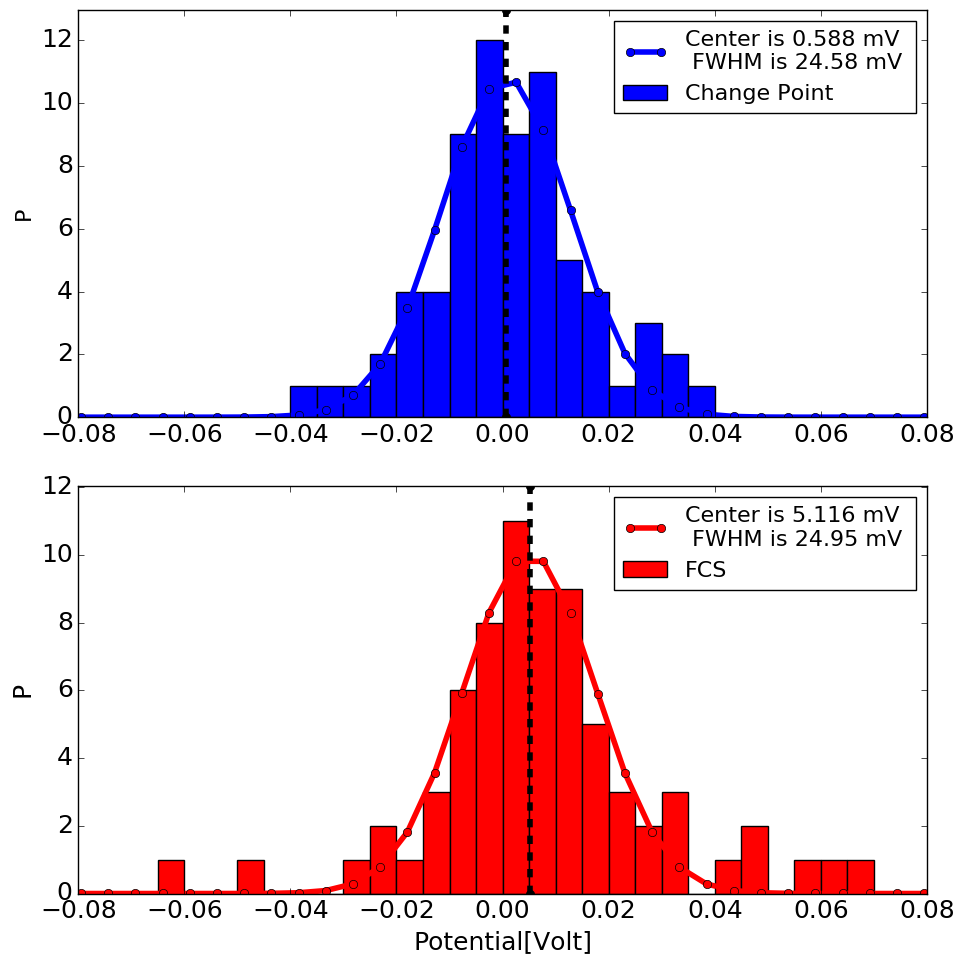

In [8]:
#MIDPOTENTIAL HISTGRAM FITTING
fig, axes = subplots(figsize=(10, 10), ncols=1, nrows=2)
# plt.figure()
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "18"

range_fit = [min_range, max_range]
bins = 40
bin_centers_on = linspace(range_fit[0], range_fit[1], bins)
x=linspace(range_fit[0], range_fit[1], 100)# for a smooth fitting plot include more points

from scipy.interpolate import interp1d
from lmfit.models import GaussianModel
mod = GaussianModel()
# params = gmodel.make_params(center=0.01, amplitude=10, sigma=0.02)


#Change point--------------------------
n,bins_on1,patches = axes[0].hist(midpoint_potential_array, bins = bins, range=range_fit, color='b', label='Change Point')
# popt, pcov = curve_fit(gaus, bin_centers_on, n)
y=n; x=bin_centers_on;
result1 = mod.fit(y, center=0.01, amplitude=10, sigma=0.02, x=x)
temp =result1.best_values
FWHM = 2*temp['sigma']*1000 #V
cent = temp['center']*1000#eV
amp = temp['amplitude']

axes[0].plot(x, result1.best_fit, '-bo', lw=4, label='Center is %.3f mV \n FWHM is %.2f mV' %(cent, FWHM))
amp = temp['amplitude']
height = 0.3989423*amp/max(1.e-15, temp['sigma'])
axes[0].plot([cent*0.001, cent*0.001], [0, height+0.2*height], '--ok', lw=4)

axes[0].set_xlim(min_x1, max_x1)
axes[0].set_ylim(0,height+0.2*height)
axes[0].set_ylabel('P', fontsize=16)
axes[0].legend(fontsize=16)

#FCS plot------------------------------
n,bins_on1,patches = axes[1].hist(midpoint_potential_array_FCS, bins = bins, range=range_fit, color='r', label='FCS')
# popt, pcov = curve_fit(gaus, bin_centers_on, n)
y=n; x=bin_centers_on;
result1 = mod.fit(y, center=0.01, amplitude=10, sigma=0.02, x=x)
temp =result1.best_values
FWHM = 2*temp['sigma']*1000 #V
cent = temp['center']*1000#eV
axes[1].plot(x, result1.best_fit, '-ro', lw=4, label='Center is %.3f mV \n FWHM is %.2f mV' %(cent, FWHM))
# axes[1].plot(x, gaus(x,*popt), color = 'k', linewidth = 3, label='$E^0_{avg}$ is %.2f mV\n FWHM is %.2f mV' %(E_mean, FWHM))
amp = temp['amplitude']
height = 0.3989423*amp/max(1.e-15, temp['sigma'])
axes[1].plot([cent*0.001, cent*0.001], [0, height+0.2*height], '--ok', lw=4)

axes[1].set_xlim(min_x2, max_x2)
axes[1].set_ylim(0,height+0.2*height)
axes[1].set_xlabel('Potential[Volt]')
axes[1].set_ylabel('P')
axes[1].legend(fontsize=16)

fig.tight_layout()
os.chdir(homedir)
fig.savefig('MidpointPotential_distribution.png', dpi=300, transparent=True)
# figure()
# result.plot()

## Histograms (2D and 3D)

In [6]:
#*************Analysis for a specific potential********************
os.chdir(homedir)
pointnumbers = 31 #Change this to the minimal amount of points
pot = 18 #number of potentials
specific_potential = 0 #the specific potential you want the plots for
max_his_on = 0.25
max_his_off = 3
rnge_on = [[0,max_his_on], [0,max_his_on]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,max_his_off], [0, max_his_off]] #range off histograms
bins_on = 40  #bins for the on histograms
bins_off = 40 #bins for the off histograms
proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
# current_dir = '20160914_CuAzuA655_Ferri_Asc_A3_50mV_300s_analysed' #foldername you want to work in.
current_dir = homedir
x_shift = 10 # t vs  t + x_shift 

df3, df_on_shifted, df_on_shifted_x, df3_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                           proteins, current_dir, max_his_on, max_his_off, x_shift, plots=False);


In [461]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
def inset_hist(axis, df,max_range = 2, bins=100, bins_inset=400):
    n_off,bins_off1,patches_off = axis.hist(df, range=(0,max_range),bins=200)
    axis.set_yticks([])
    axis.set_ylabel("#")
    axis.set_xscale("log")
#     axis.set_ylim(0, max(n_off))
#     insert_ax = inset_axes(axis,height="50%", width="50%")
#     n_off,bins_off1,patches_off = insert_ax.hist(df, range=(0,max_range),bins=bins_inset)
#     insert_ax.set_xlim(0, 0.1)

#     insert_ax.set_yticks([])
#     insert_ax.set_xticks([0, 0.1])
#     insert_ax.set_ylabel("#")
#     insert_ax.set_xscale("log")
#     return(axis, insert_ax)
    return(axis)

# fig, axes = plt.subplots(1,2, figsize=(10, 4))
# inset_hist(axes[0], df3)
# inset_hist(axes[1], df3_off)
# tight_layout()

The file Point_A2_100mV(6)_60.5__30s_2.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A3_100mV(7)_60.5__30s_15.pt3.datn.em.plot does not exist
The file Point_A2_050mV(8)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_050mV(8)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A3_050mV(12)_60.5__30s_19.pt3.datn.em.plot does not exist
The file Point_A2_090mV(18)_60.5__30s_11.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_2.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A3_100mV(7)_60.5__30s_15.pt3.datn.em.plot does not exist


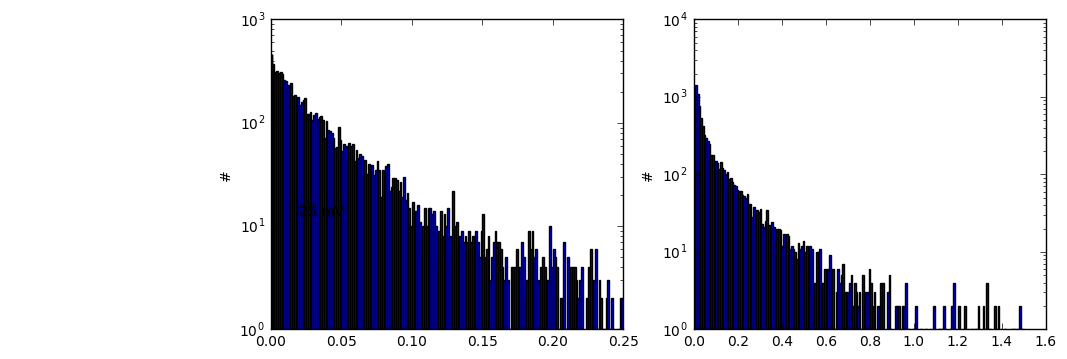

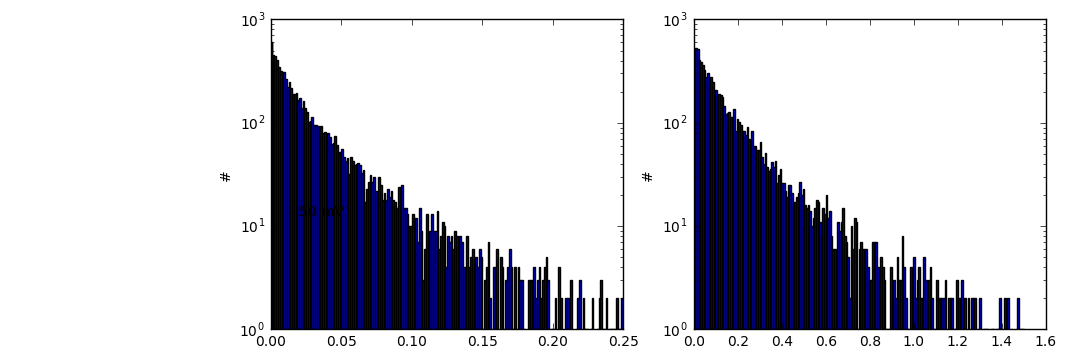

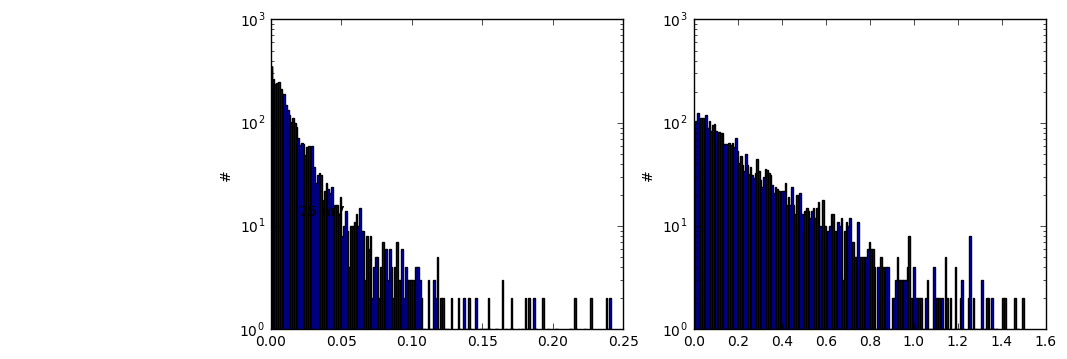

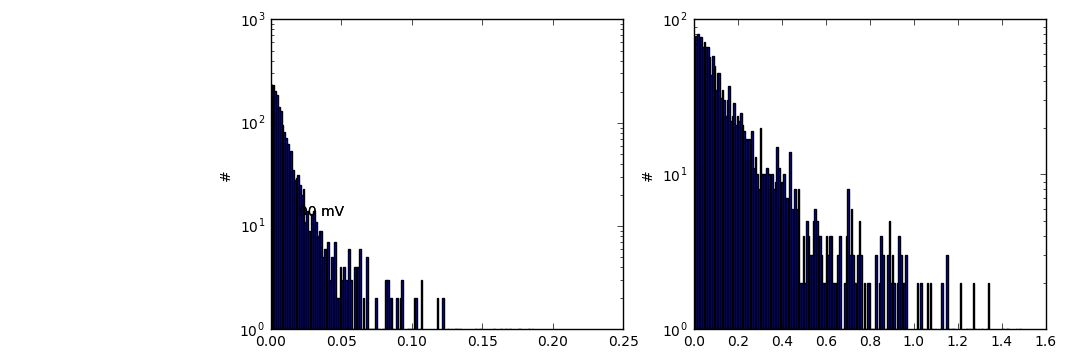

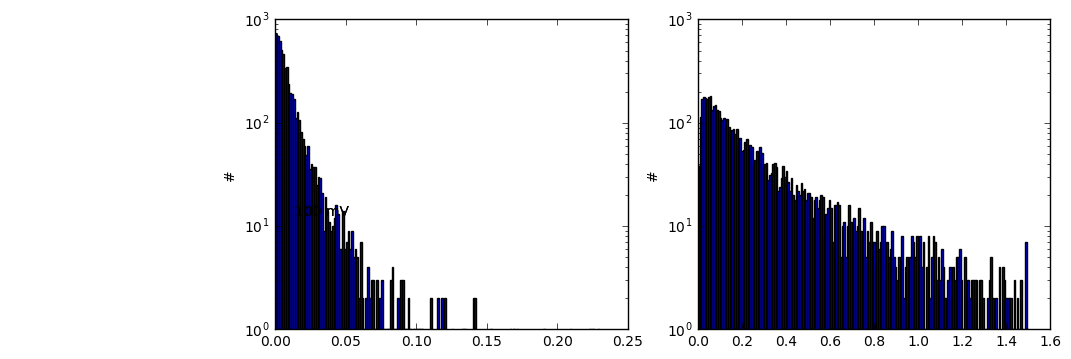

In [13]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

df3, df_on_shifted, df_on_shifted_x, df3_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                                                            proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
# fig, ax = plt.subplots()
def inset_hist(axis=ax, df=df3,max_range = 2, bins=100, bins_inset=400, specific_potential=0):
    n_off,bins_off1,patches_off = axis.hist(df, range=(0,max_range),bins=200)
    axis.set_yticks([])
    axis.set_ylabel("#")
    axis.set_yscale("log")
    axis.text(0.8, 0.5,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    axis.text(-0.5, 0.5,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    return(axis)
############
potential_list = [25, 50, 75, 90, 100]
l = len(potential_list)
l=int(l)
for i in range(l):
    fig, axes = plt.subplots(1,2, figsize=(10, 4), squeeze=False)
    specific_potential = potential_list[i]
    df3, df_on_shifted, df_on_shifted_x, df3_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                       proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
    inset_hist(axes[0, 0], df3, max_range=0.25, specific_potential=specific_potential)#ON-time (LEFT)
    inset_hist(axes[0, 1], df3_off, max_range=1.5, specific_potential=specific_potential) #OFF time(RIGHT)

The file Point_A2_000mV(7)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_000mV(7)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A2_000mV(36)_60.5__30s_19.pt3.datn.em.plot does not exist
The file Point_A2_050mV(8)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_050mV(8)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A3_050mV(12)_60.5__30s_19.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_2.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A3_100mV(7)_60.5__30s_15.pt3.datn.em.plot does not exist


(0, 0.2)

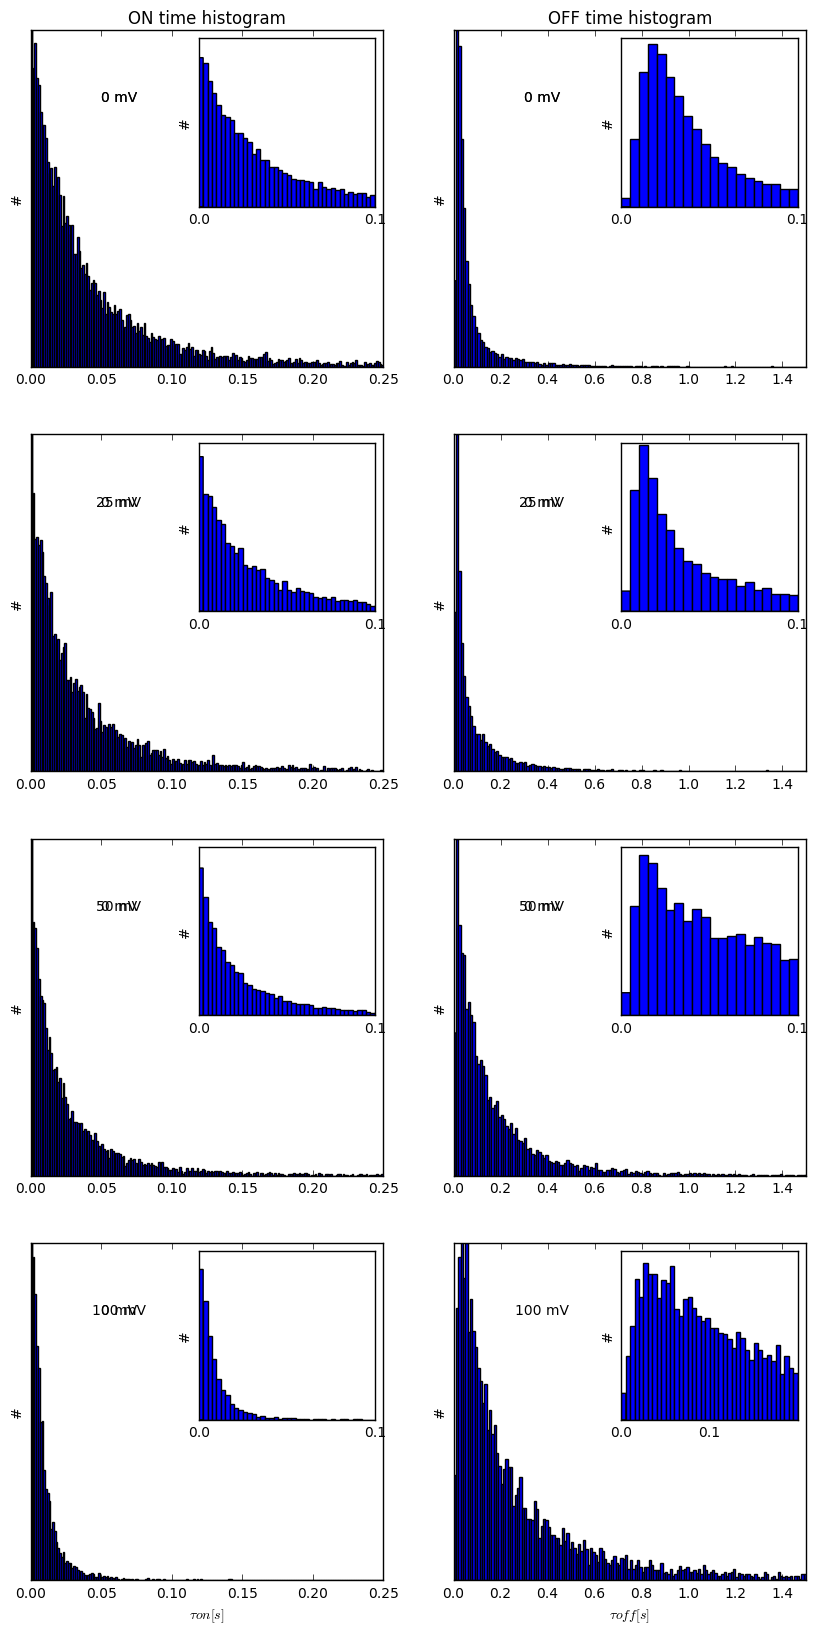

In [14]:
#HIstogram with zoom in
from mpl_toolkits.axes_grid.inset_locator import inset_axes
def inset_hist(axis, df,max_range = 2, bins=100, bins_inset=400,specific_potential=0):
    n_off,bins_off1,patches_off = axis.hist(df, range=(0,max_range),bins=200)
    axis.set_yticks([])
    axis.set_ylabel("#")
#     axis.set_yscale("log")
    axis.set_ylim(0, max(n_off))
    axis.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    insert_ax = inset_axes(axis,height="50%", width="50%")
    n_off,bins_off1,patches_off = insert_ax.hist(df, range=(0,max_range),bins=bins_inset)
    insert_ax.set_xlim(0, 0.1)

    insert_ax.set_yticks([])
    insert_ax.set_xticks([0, 0.1])
    insert_ax.set_ylabel("#")
#     insert_ax.set_xscale("log")
    return(axis, insert_ax)
#----------------------------------------------------#-----------------------------------
fig, axes = plt.subplots(4, 2, figsize=(10, 20), squeeze=False) #Set Figure/Subplot parameters
#0 mV: Define Potential Here
specific_potential = 0
df_on, df_on_shifted, df_on_shifted_x, df_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                       proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
ax, in_ax = inset_hist(axes[0, 0], df_on, max_range = 0.25, bins=100, bins_inset=100)#ON hist-plot
ax.set_xlim(0, 0.25)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.set_title('ON time histogram')
ax, in_ax = inset_hist(axes[0, 1], df_off, max_range = 2, bins=100, bins_inset=400)#OFF hist-plot
ax.set_xlim(0, 1.5)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.set_title('OFF time histogram')
in_ax.set_yticks([]); in_ax.set_xticks([0, 0.1])

#----------------------------------------------------#-----------------------------------
#25 mV: Define Potential Here
specific_potential =25
df_on, df_on_shifted, df_on_shifted_x, df_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                       proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
ax, in_ax = inset_hist(axes[1,0], df_on, max_range = 0.25, bins=100, bins_inset=100)#ON hist-plot
ax.set_xlim(0, 0.25)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax, in_ax = inset_hist(axes[1,1], df_off, max_range = 2, bins=100, bins_inset=400)#OFF hist-plot
ax.set_xlim(0, 1.5)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.set_ylabel("#"); in_ax.set_ylabel("#")

#----------------------------------------------------#-----------------------------------
#50 mV: Define Potential Here
specific_potential =50
df_on, df_on_shifted, df_on_shifted_x, df_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                       proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
ax, in_ax = inset_hist(axes[2,0], df_on, max_range = 0.25, bins=100, bins_inset=100)#ON hist-plot
ax.set_xlim(0, 0.25)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax, in_ax = inset_hist(axes[2,1], df_off, max_range = 2, bins=100, bins_inset=400)#OFF hist-plot
ax.set_xlim(0, 1.5)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.set_ylabel("#"); in_ax.set_ylabel("#")

#----------------------------------------------------#-----------------------------------
#100 mV: Define Potential Here
specific_potential =100
df_on, df_on_shifted, df_on_shifted_x, df_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                       proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
ax, in_ax = inset_hist(axes[3,0], df_on, max_range = 0.25, bins=100, bins_inset=100)#ON hist-plot
ax.set_xlim(0, 0.25)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.set_xlabel(r"$\tau{on}[s]$")

ax, in_ax = inset_hist(axes[3,1], df_off, max_range = 2, bins=100, bins_inset=400)#OFF hist-plot
ax.set_xlim(0, 1.5)
ax.text(0.25, 0.8,str(specific_potential)+' mV', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
ax.set_xlabel(r"$\tau{off}[s]$")
in_ax.set_xlim(0, 0.2)
# tight_layout()


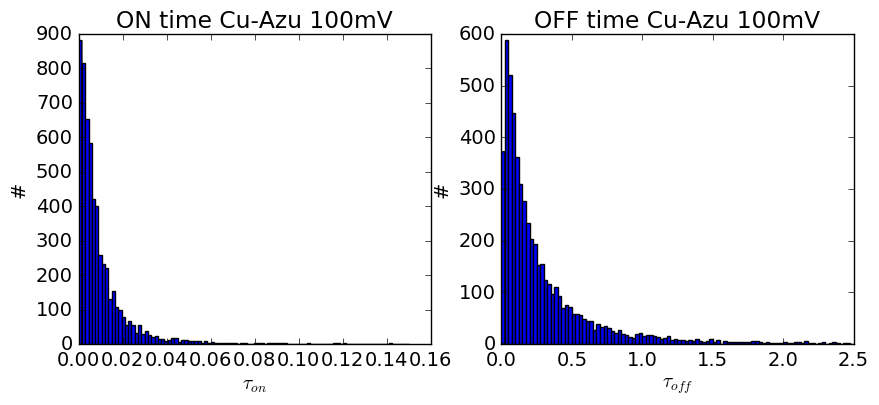

In [7]:
max_his_on = 0.15; max_his_off = 2.5;
bins_on = 100; bins_off = 100
fig1, axes1 = plt.subplots(1, 2, figsize=(10,4))

n,bins_on1,patches = axes1[0].hist(df3, range=(0,max_his_on),bins=bins_on)
axes1[0].set_xlabel(r'$\tau_{on}$')
axes1[0].set_ylabel('#')
# axes1[0].set_yscale('log')
axes1[0].set_title("ON time %s-Azu %smV" %(proteins, specific_potential))

n_off,bins_off1,patches_off = axes1[1].hist(df3_off, range=(0,max_his_off),bins=bins_off)
axes1[1].set_xlabel(r'$\tau_{off}$')
axes1[1].set_ylabel('#')
# axes1[1].set_yscale('log')
axes1[1].set_title('OFF time %s-Azu %smV' %(proteins, specific_potential))


### Off histogram

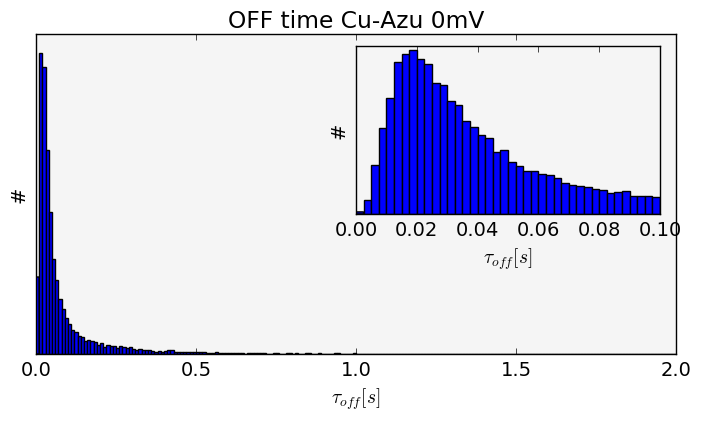

In [47]:
# df3, df_on_shifted, df_on_shifted_x, df3_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
#                                                                                             proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
def inset_hist(df3_off, max_range=0.25, bins=100, bins_inset=200):
    fig = plt.figure(figsize=(8, 4))
    #outer figure
    ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], axisbg="#f5f5f5")
    n_off,bins_off1,patches_off = ax.hist(df3_off, range=(0,max_his_off),bins=200)
    ax.set_ylabel('#')
    ax.set_yticks([])
    # axes1[1].set_yscale('log')
    ax.set_title('OFF time %s-Azu %smV' %(proteins, specific_potential))
    
    #inset figure
    ax = fig.add_axes([0.5, 0.5, 0.38, 0.42], axisbg='none')
    n_off,bins_off1,patches_off = ax.hist(df3_off, range=(0,max_his_off),bins=800)
    ax.set_xlim(0, 0.1)
    ax.set_xlabel(r'$\tau_{off}[s]$')
    ax.set_ylabel('#')
    ax.set_yticks([])

### ON-time histogram

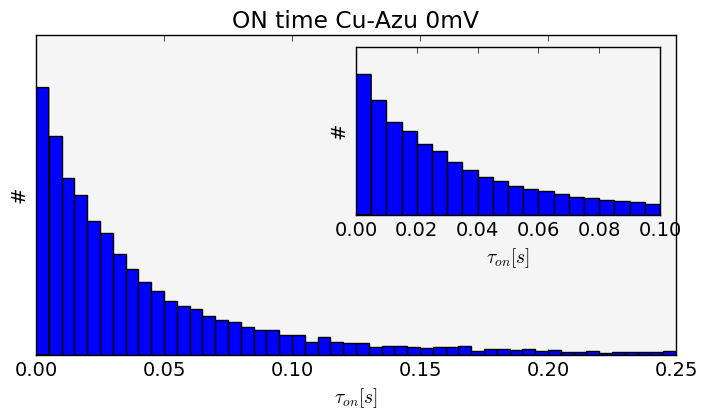

In [48]:
# df3, df_on_shifted, df_on_shifted_x, df3_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
#                                                                                             proteins, current_dir, max_his_on, max_his_off, x_shift,plots=False)
max_his_on = 0.15; max_his_off = 0.25;
# bins_on = 100; bins_off = 400
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], axisbg="#f5f5f5")
n_off,bins_off1,patches_off = ax.hist(df3, range=(0,max_his_off),bins=50, color = 'blue')
ax.set_xlabel(r'$\tau_{on}[s]$')
ax.set_ylabel('#')
ax.set_yticks([])
# axes1[1].set_yscale('log')
ax.set_title('ON time %s-Azu %smV' %(proteins, specific_potential))

ax = fig.add_axes([0.5, 0.5, 0.38, 0.42], axisbg='none')
n_off,bins_off1,patches_off = ax.hist(df3, range=(0,max_his_off),bins=50, color='blue')
ax.set_xlim(0, 0.1)
ax.set_xlabel(r'$\tau_{on}[s]$')
ax.set_ylabel('#')
ax.set_yticks([])
savefig(homedir+'/ON.pdf', dpi=300, transparent=True)

### 2D histogram

In [435]:
#*************Analysis for a specific potential********************
os.chdir(homedir)
pointnumbers = 31 #Change this to the minimal amount of points
pot = 18 #number of potentials
specific_potential = 100 #the specific potential you want the plots for
max_his_on = 0.25
max_his_off = 3
rnge_on = [[0,max_his_on], [0,max_his_on]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,max_his_off], [0, max_his_off]] #range off histograms
bins_on = 40  #bins for the on histograms
bins_off = 40 #bins for the off histograms
proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
# current_dir = '20160914_CuAzuA655_Ferri_Asc_A3_50mV_300s_analysed' #foldername you want to work in.
current_dir = homedir
x_shift = 50 # t vs  t + x_shift 

df3, df_on_shifted, df_on_shifted_x, df3_off, df_off_shifted, df_off_shifted_x = histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off,
                                                           proteins, current_dir, max_his_on, max_his_off, x_shift, plots=False);

The file Point_A2_100mV(6)_60.5__30s_2.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_22.pt3.datn.em.plot does not exist
The file Point_A2_100mV(6)_60.5__30s_9.pt3.datn.em.plot does not exist
The file Point_A3_100mV(7)_60.5__30s_15.pt3.datn.em.plot does not exist


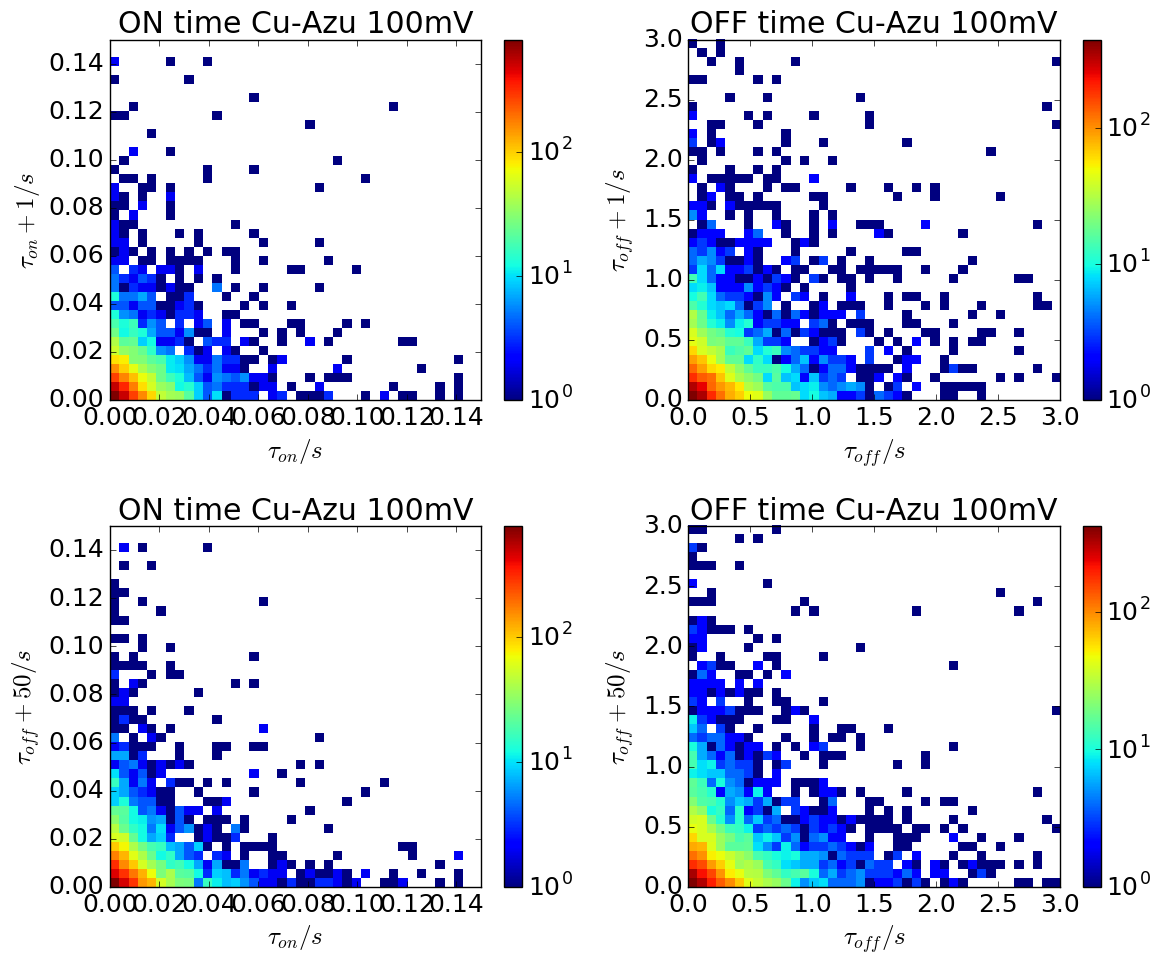

In [437]:
max_his_on = 0.15
max_his_off = 3
rnge_on = [[0,max_his_on], [0,max_his_on]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,max_his_off], [0, max_his_off]] #range off histograms
bins_on = 40  #bins for the on histograms
bins_off = 40 #bins for the off histograms

#
fig2 = plt.figure(figsize=(12,10))
ax3 = fig2.add_subplot(2,2,1)
hist2d(df3[specific_potential],df_on_shifted[specific_potential], range=rnge_on ,bins=bins_on, norm=LogNorm());
colorbar()
ax3.set_title('ON time %s-Azu %smV' %(proteins, specific_potential))
ax3.set_xlabel(r'$\tau_{on}/s$')
ax3.set_ylabel(r'$\tau_{on}+1/s$')

ax4 = fig2.add_subplot(2,2,2)
hist2d(df3_off[specific_potential],df_off_shifted[specific_potential], range=rnge_off,bins=bins_off, norm=LogNorm());
colorbar()
ax4.set_title('OFF time %s-Azu %smV' %(proteins, specific_potential))
ax4.set_xlabel(r'$\tau_{off}/s$')
ax4.set_ylabel(r'$\tau_{off}+1/s$')
plt.tight_layout()

ax5 = fig2.add_subplot(2,2,3)
hist2d(df3[specific_potential],df_on_shifted_x[specific_potential], range=rnge_on ,bins=bins_on, norm=LogNorm());
colorbar()
ax5.set_title('ON time %s-Azu %smV' %(proteins, specific_potential))
ax5.set_xlabel(r'$\tau_{on}/s$')
ax5.set_ylabel(r'$\tau_{off}+%s/s$' %x_shift)

ax6 = fig2.add_subplot(2,2,4)
hist2d(df3_off[specific_potential],df_off_shifted_x[specific_potential], range=rnge_off,bins=bins_off, norm=LogNorm());
colorbar()
ax6.set_title('OFF time %s-Azu %smV' %(proteins, specific_potential))
ax6.set_xlabel(r'$\tau_{off}/s$')
ax6.set_ylabel(r'$\tau_{off}+%s/s$' %x_shift)
plt.tight_layout()    

## Test code

In [50]:
foldername = r'D:/Research/Experimental/Analysis/2017analysis/201702/Analysis_Sebby_March_2017/S101d14Feb17_60.5_635_A2_CuAzu655/'
df_datn_emplot, df_FCS, folder = dir_mV_molNo(foldername)
df_datn_emplot.head(4)

,Point number,Potential,filename[.datn],filepath[.datn],filename[.em.plot],filepath[.em.plot]
0,1.0,0.0,Point_A2_000mV(7)_60.5__30s_1.pt3.datn,D:/Research/Experimental/Analysis/2017analysis...,Point_A2_000mV(7)_60.5__30s_1.pt3.datn.em.plot,D:/Research/Experimental/Analysis/2017analysis...
1,1.0,15.0,Point_A2_015mV(19)_60.5__30s_1.pt3.datn,D:/Research/Experimental/Analysis/2017analysis...,Point_A2_015mV(19)_60.5__30s_1.pt3.datn.em.plot,D:/Research/Experimental/Analysis/2017analysis...
2,1.0,20.0,Point_A2_020mV(21)_60.5__30s_1.pt3.datn,D:/Research/Experimental/Analysis/2017analysis...,Point_A2_020mV(21)_60.5__30s_1.pt3.datn.em.plot,D:/Research/Experimental/Analysis/2017analysis...
3,1.0,25.0,Point_A2_025mV(15)_60.5__30s_1.pt3.datn,D:/Research/Experimental/Analysis/2017analysis...,Point_A2_025mV(15)_60.5__30s_1.pt3.datn.em.plot,D:/Research/Experimental/Analysis/2017analysis...


In [51]:
df_FCS.head()

,Point number,Potential,filename[FCS],filepath[FCS]
0,1.0,0.0,Point_A2_000mV(7)_60.5__30s_1_FCS1.dat,D:/Research/Experimental/Analysis/2017analysis...
1,1.0,15.0,Point_A2_015mV(19)_60.5__30s_1_FCS1.dat,D:/Research/Experimental/Analysis/2017analysis...
2,1.0,20.0,Point_A2_020mV(21)_60.5__30s_1_FCS1.dat,D:/Research/Experimental/Analysis/2017analysis...
3,1.0,25.0,Point_A2_025mV(15)_60.5__30s_1_FCS1.dat,D:/Research/Experimental/Analysis/2017analysis...
4,1.0,35.0,Point_A2_035mV(20)_60.5__30s_1_FCS1.dat,D:/Research/Experimental/Analysis/2017analysis...


## Import functions from Analysis_bis

In [21]:
os.chdir(parentdir)
from Analysis_bis import dir_mV_molNo, time_trace_plot, FCS_plot

In [26]:
folderpath = r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d14Feb17_60.5_635_A2_CuAzu655'
df_datn_emplot, df_FCS, foldername  =dir_mV_molNo(folderpath)
df_datn_emplot.head(2)

,Point number,Potential,filename[.datn],filepath[.datn],filename[.em.plot],filepath[.em.plot]
0,1.0,0.0,Point_A2_000mV(7)_60.5__30s_1.pt3.datn,D:\Research\Experimental\Analysis\2017analysis...,Point_A2_000mV(7)_60.5__30s_1.pt3.datn.em.plot,D:\Research\Experimental\Analysis\2017analysis...
1,1.0,15.0,Point_A2_015mV(19)_60.5__30s_1.pt3.datn,D:\Research\Experimental\Analysis\2017analysis...,Point_A2_015mV(19)_60.5__30s_1.pt3.datn.em.plot,D:\Research\Experimental\Analysis\2017analysis...


### Writing, saving and reading Excel (with MutiIndex)

In [31]:
# #saving
# writer = pd.ExcelWriter('output.xlsx')
# df1.to_excel(writer,'Sheet1')
# df2.to_excel(writer,'Sheet2')
# writer.save()
# #Reading
# df_excel = pd.read_excel('output.xlsx', sheetname='shheeet', header=[0,1], index_col=[0])
# # df_excel

### Timetrace plot

0.0
25.0


C:\Users\Pradhan\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Pradhan\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


50.0
100.0


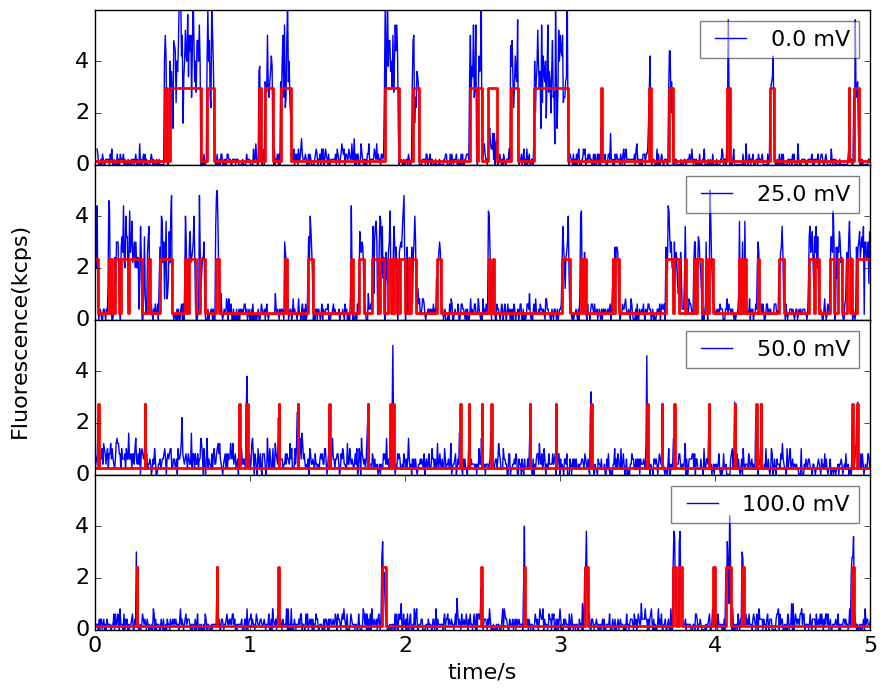

In [12]:
folderpath = r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d14Feb17_60.5_635_A2_CuAzu655'
fig = time_trace_plot(foldername= folderpath, input_potential=[0, 25, 50, 100], pointnumbers=[1], x_lim_min=0, y_lim_min=0, x_lim_max=5, y_lim_max=6, bin=5, show_changepoint=True)

### FCS plot

0.0
g(t) = 6.84598805194e-19 + 2.49653456692 * exp(-t/30.2389594619) + 1.11411557832 * exp(-t/0.410722485079)
25.0
g(t) = 0.0117917539457 + 1.38967835671 * exp(-t/18.142695955) + 0.569739242554 * exp(-t/0.116687910694)
50.0
g(t) = 1.8284518742e-16 + 1.22477622473 * exp(-t/2.5909552564) + 0.0907577554916 * exp(-t/0.30713729472)
100.0
g(t) = 3.06741273527e-18 + 1.86741523295 * exp(-t/7.58070070398) + 1.01167358988 * exp(-t/0.28792665321)


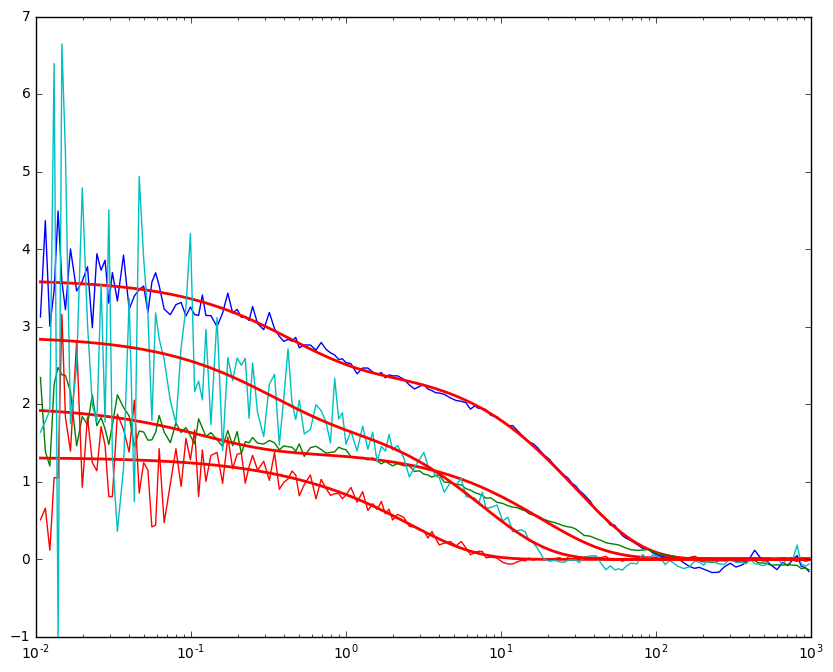

In [49]:
fig=FCS_plot(foldername= foldername, tmin=0.01) # FCS_plot(foldername= foldername, input_potential=[0, 25, 50, 100], pointnumbers=[1], tmin=0.005, tmax=1000, kind='bi')

In [541]:
pointnumbers = linspace(1, 40, 40);pointnumbers = pointnumbers.astype(int);
potentialist = linspace(-100, 200, 1+(200-(-100))/5);
folderpath = r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d14Feb17_60.5_635_A2_CuAzu655'
def timetrace_outputs_folderwise(folderpath=folderpath, pointnumbers=[1], potentialist=potentialist):
    df_datn_emplot, df_FCS, folderpath = dir_mV_molNo(foldername=folderpath)
    df_datn_emplot = df_datn_emplot[df_datn_emplot['Point number'].isin(pointnumbers)]#keep all the points that exist
    df_datn_emplot = df_datn_emplot[df_datn_emplot['Potential'].isin(potentialist)]
    out_total = pd.DataFrame()
    for input_number in pointnumbers:
        df_datnem_specific = df_datn_emplot[df_datn_emplot['Point number']==input_number]
        
        if not df_datnem_specific.empty:
            #---------Create Pandas array to save outputs----------
            indices = np.ones(13); indices=indices.astype(str)
            Point_number = 'Point_'+str(input_number)
            indices[:]=Point_number
            group_1 = ['Potential']
            group_ind = np.ones(6);group_ind = group_ind.astype(str)
            group_2=group_ind.copy(); group_2[:]='t_ratio_timetrace'
            group_3 = group_ind.copy(); group_3[:]='t_ratio_FCS'
            group=concatenate((group_1, group_2, group_3))
            subgroup_1 = ['Potential']
            subgroup_2 = ['t_onav', 't_onaverr', 't_offav','t_offaverr','t_ratio', 't_ratioerr']
            subgroup_3 = subgroup_2;
            subgroup = concatenate((subgroup_1, subgroup_2, subgroup_3))
            arrays = [indices, group, subgroup]
            col = pd.MultiIndex.from_arrays(arrays)
            length=(len(df_datnem_specific))#for defining dimension of out_mat
            out_point = pd.DataFrame(zeros((length, len(subgroup))), columns=col)#create zeroes which will be replaced by proper values

            #---------Pandas array created to save outputs----
            out_point[Point_number]['Potential']=df_datnem_specific['Potential']
            t_onav=[];t_onaverr=[]; t_offav=[]; t_offaverr=[]; t_ratio=[]; t_ratioerr=[] #Empty forms for timetrace output
            
            for i in range(length):
                t_onav.append(i)
                t_onaverr.append(i+1)
                t_offav.append(i+3)
                t_offaverr.append(i+4)
                t_ratio.append(i+10)
                t_ratioerr.append(i+20)
                potential = out_mat['Point number']['Potential']['Potential'][i]
                df_datnem_potential = df_datn_emplot[df_datn_emplot['Potential']==potential]
                df_datnem_potential = df_datn_emplot[df_datn_emplot['Potential']==potential]
                df_datnem_potential.reset_index(drop=True, inplace=True);
                df_datn_path = df_datnem_potential['filepath[.datn]'][0]
                df_em_path = df_datnem_potential['filepath[.em.plot]'][0]

                df_datn = pd.read_csv(df_datn_path, header=None)
                df_emplot = pd.read_csv(df_em_path, header=None, sep='\t')
    #         df_datnem_specific = df_datnem_specific[df_datnem_specific['Potential'].isin(potentialist)]; df_datnem_specific.reset_index(drop=True, inplace=True)
            df_create=array([t_onav, t_onaverr, t_offav, t_offaverr, t_ratio, t_ratioerr])
            df_create=df_create.astype(float64)#;a=pd.DataFrame(a)
            df_create = pd.DataFrame(df_create.T, columns=['t_onav', 't_onaverr', 't_offav','t_offaverr','t_ratio', 't_ratioerr'])
            out_point[Point_number]['t_ratio_timetrace']=df_create
            out_total=pd.concat([out_total, out_point], axis=1)
    return(out_total)

In [542]:
a=timetrace_outputs_folderwise()

In [355]:
out_mat=array(out_mat)

In [543]:
a

Point_1                                                         \
   Potential t_ratio_timetrace                                        
   Potential            t_onav t_onaverr t_offav t_offaverr t_ratio   
0        0.0               0.0       1.0     3.0        4.0    10.0   
1       15.0               1.0       2.0     4.0        5.0    11.0   
2       20.0               2.0       3.0     5.0        6.0    12.0   
3       25.0               3.0       4.0     6.0        7.0    13.0   
4       35.0               4.0       5.0     7.0        8.0    14.0   
5       40.0               5.0       6.0     8.0        9.0    15.0   
6       50.0               6.0       7.0     9.0       10.0    16.0   
7       55.0               7.0       8.0    10.0       11.0    17.0   
8       60.0               8.0       9.0    11.0       12.0    18.0   
9       75.0               9.0      10.0    12.0       13.0    19.0   
10      90.0              10.0      11.0    13.0       14.0    20.0   
11     100.0              11.0      12.0    14.0       15.0    21.0   

                                                                           
              t_ratio_FCS                                                  
   t_ratioerr      t_onav t_onaverr t_offav t_offaverr t_ratio t_ratioerr  
0        20.0         0.0       0.0     0.0        0.0     0.0        0.0  
1        21.0         0.0       0.0     0.0        0.0     0.0        0.0  
2        22.0         0.0       0.0     0.0        0.0     0.0        0.0  
3        23.0         0.0       0.0     0.0        0.0     0.0        0.0  
4        24.0         0.0       0.0     0.0        0.0     0.0        0.0  
5        25.0         0.0       0.0     0.0        0.0     0.0        0.0  
6        26.0         0.0       0.0     0.0        0.0     0.0        0.0  
7        27.0         0.0       0.0     0.0        0.0     0.0        0.0  
8        28.0         0.0       0.0     0.0        0.0     0.0        0.0  
9        29.0         0.0       0.0     0.0        0.0     0.0        0.0  
10       30.0         0.0       0.0     0.0        0.0     0.0        0.0  
11       31.0         0.0       0.0     0.0        0.0     0.0        0.0

In [555]:
pointnumbers = linspace(1, 40, 40);pointnumbers = pointnumbers.astype(int);
potentialist = linspace(-100, 200, 1+(200-(-100))/5);
folderpath = r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d14Feb17_60.5_635_A2_CuAzu655'
def timetrace_outputs_folderwise(folderpath=folderpath, pointnumbers=[1], potentialist=potentialist):
    df_datn_emplot, df_FCS, folderpath = dir_mV_molNo(foldername=folderpath)
    df_datn_emplot = df_datn_emplot[df_datn_emplot['Point number'].isin(pointnumbers)]#keep all the points that exist
    df_datn_emplot = df_datn_emplot[df_datn_emplot['Potential'].isin(potentialist)]
    out_total = pd.DataFrame()
    for input_number in pointnumbers:
        df_datnem_specific = df_datn_emplot[df_datn_emplot['Point number']==input_number]
        
        if not df_datnem_specific.empty:
            #---------Create Pandas array to save outputs----------
            indices = np.ones(13); indices=indices.astype(str)
            Point_number = 'Point_'+str(input_number)
            indices[:]=Point_number
            group_1 = ['Potential']
            group_ind = np.ones(6);group_ind = group_ind.astype(str)
            group_2=group_ind.copy(); group_2[:]='t_ratio_timetrace'
            group_3 = group_ind.copy(); group_3[:]='t_ratio_FCS'
            group=concatenate((group_1, group_2, group_3))
            subgroup_1 = ['Potential']
            subgroup_2 = ['t_onav', 't_onaverr', 't_offav','t_offaverr','t_ratio', 't_ratioerr']
            subgroup_3 = subgroup_2;
            subgroup = concatenate((subgroup_1, subgroup_2, subgroup_3))
            arrays = [indices, group, subgroup]
            col = pd.MultiIndex.from_arrays(arrays)
            length=(len(df_datnem_specific))#for defining dimension of out_mat
            out_point = pd.DataFrame(zeros((length, len(subgroup))), columns=col)#create zeroes which will be replaced by proper values

            #---------Pandas array created to save outputs----
            out_point[Point_number]['Potential']=df_datnem_specific['Potential']
            t_onav=[];t_onaverr=[]; t_offav=[]; t_offaverr=[]; t_ratio=[]; t_ratioerr=[] #Empty forms for timetrace output
            t_onavfcs=[];t_onaverrfcs=[]; t_offavfcs=[]; t_offaverrfcs=[]; t_ratiofcs=[]; t_ratioerrfcs=[] #Empty forms for timetrace output
            for i in range(length):
                # .datn and em.plot data analysis
                t_onav.append(i)
                t_onaverr.append(i+1)
                t_offav.append(i+3)
                t_offaverr.append(i+4)
                t_ratio.append(i+10)
                t_ratioerr.append(i+20)
                potential = out_mat['Point number']['Potential']['Potential'][i]
                df_datnem_potential = df_datn_emplot[df_datn_emplot['Potential']==potential]
                df_datnem_potential = df_datn_emplot[df_datn_emplot['Potential']==potential]
                df_datnem_potential.reset_index(drop=True, inplace=True);
                df_datn_path = df_datnem_potential['filepath[.datn]'][0]
                df_em_path = df_datnem_potential['filepath[.em.plot]'][0]
                
                df_datn = pd.read_csv(df_datn_path, header=None)
                df_emplot = pd.read_csv(df_em_path, header=None, sep='\t')
                
                # FCS data analysis
                t_onavfcs.append(i*2)
                t_onaverrfcs.append(i*5)
                t_offavfcs.append(i*1+1)
                t_offaverrfcs.append(i*0.5)
                t_ratiofcs.append(i*6)
                t_ratioerrfcs.append(i*7)
            df_create=array([t_onav, t_onaverr, t_offav, t_offaverr, t_ratio, t_ratioerr])
            df_create=df_create.astype(float64)#;a=pd.DataFrame(a)
            df_create = pd.DataFrame(df_create.T, columns=['t_onav', 't_onaverr', 't_offav','t_offaverr','t_ratio', 't_ratioerr'])
            out_point[Point_number]['t_ratio_timetrace']=df_create
            
            df_create_fcs = array([t_onavfcs,t_onaverrfcs, t_offavfcs, t_offaverrfcs, t_ratiofcs, t_ratioerrfcs])
            df_create_fcs = df_create_fcs.astype(float64)
            df_create_fcs = pd.DataFrame(df_create_fcs.T, columns=subgroup_2)
            out_point[Point_number]['t_ratio_FCS']=df_create_fcs
            
            out_total=pd.concat([out_total, out_point], axis=1);
    return(out_total)

In [556]:
a=timetrace_outputs_folderwise()
a

Point_1                                                         \
   Potential t_ratio_timetrace                                        
   Potential            t_onav t_onaverr t_offav t_offaverr t_ratio   
0        0.0               0.0       1.0     3.0        4.0    10.0   
1       15.0               1.0       2.0     4.0        5.0    11.0   
2       20.0               2.0       3.0     5.0        6.0    12.0   
3       25.0               3.0       4.0     6.0        7.0    13.0   
4       35.0               4.0       5.0     7.0        8.0    14.0   
5       40.0               5.0       6.0     8.0        9.0    15.0   
6       50.0               6.0       7.0     9.0       10.0    16.0   
7       55.0               7.0       8.0    10.0       11.0    17.0   
8       60.0               8.0       9.0    11.0       12.0    18.0   
9       75.0               9.0      10.0    12.0       13.0    19.0   
10      90.0              10.0      11.0    13.0       14.0    20.0   
11     100.0              11.0      12.0    14.0       15.0    21.0   

                                                                           
              t_ratio_FCS                                                  
   t_ratioerr      t_onav t_onaverr t_offav t_offaverr t_ratio t_ratioerr  
0        20.0         0.0       0.0     1.0        0.0     0.0        0.0  
1        21.0         2.0       5.0     2.0        0.5     6.0        7.0  
2        22.0         4.0      10.0     3.0        1.0    12.0       14.0  
3        23.0         6.0      15.0     4.0        1.5    18.0       21.0  
4        24.0         8.0      20.0     5.0        2.0    24.0       28.0  
5        25.0        10.0      25.0     6.0        2.5    30.0       35.0  
6        26.0        12.0      30.0     7.0        3.0    36.0       42.0  
7        27.0        14.0      35.0     8.0        3.5    42.0       49.0  
8        28.0        16.0      40.0     9.0        4.0    48.0       56.0  
9        29.0        18.0      45.0    10.0        4.5    54.0       63.0  
10       30.0        20.0      50.0    11.0        5.0    60.0       70.0  
11       31.0        22.0      55.0    12.0        5.5    66.0       77.0